## 퍼셉트론
- 퍼셉트론(Perceptron)이란, 고전적인 인공 신경망(Artificial Neural Network, ANN) 알고리즘입니다.

## 단층 퍼셉트론(단층신경망)
1. 입력층(Input Layer)이 은닉층(hidden layer)을 거치지 않고 직접 출력층(Output Layer)에 연결되는 단층신경망.
2. 주로 선형 이진 분류 문제를 해결하는 데 사용.
3. 단층 퍼셉트론은 입력 데이터가 선형적으로 분리 가능한 경우에 사용가능.
4. 단층 퍼셉트론은 복잡한 비선형 패턴을 인식할 수 없음.

## 구성요소:

1. 입력층(Input Layer)
2. 가중치(Weights)
3. 편향(Bias)
4. 출력층(Output Layer)

In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt 

In [7]:
class Perceptron:
    def __init__(self, learning_rate=0.1, n_iter=10):
        self.learning_rate = learning_rate # 학습률(learning rate)과 
        self.n_iter = n_iter # 반복 횟수(n_iter)를 초기화합니다.
        self.weights = None
        self.bias = None

    def fit(self, X, y): # 가중치(weights)와 편향(bias)을 초기화하고, 지정된 반복 횟수만큼 학습을 진행합니다.
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0
        
        for _ in range(self.n_iter):
            for idx, sample in enumerate(X):
                linear_output = np.dot(sample, self.weights) + self.bias
                y_predicted = self.activation_function(linear_output)
                update = self.learning_rate * (y[idx] - y_predicted)
                self.weights += update * sample
                self.bias += update

    def activation_function(self, x): # 단위 계단 함수로, 입력이 0 이상이면 1, 그렇지 않으면 0을 반환합니다
        return np.where(x >= 0, 1, 0)

    def predict(self, X): # 입력 데이터 X에 대한 예측을 수행합니다.
        linear_output = np.dot(X, self.weights) + self.bias
        return self.activation_function(linear_output)

def plot_decision_boundary(X, y, model):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                         np.arange(y_min, y_max, 0.01))
    
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.8)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolor='k', marker='o')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title('Perceptron Decision Boundary')
    plt.show()

### AND 게이트
- 두 개 이상의 입력을 받아들이고, 모든 입력이 1일 때만 출력이 1이 되는 논리 연산을 수행합니다.

In [9]:
# AND 게이트
# 입력 데이터와 출력 레이블을 정의합니다.
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = np.array([0, 0, 0, 1])

예측 결과: [0 0 0 1]


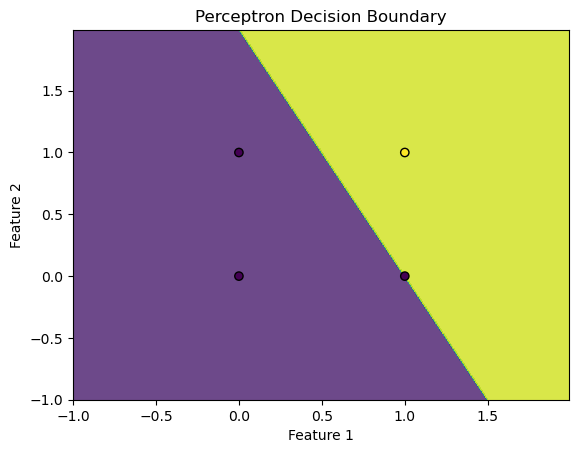

In [10]:
# 퍼셉트론 학습시키기
model = Perceptron(learning_rate=0.1, n_iter=10)
model.fit(X, y)

predictions = model.predict(X)  # 예측
print("예측 결과:", predictions)

plot_decision_boundary(X, y, model)  # 시각화

### OR 게이트
- OR 게이트는 두 개 이상의 입력을 받아들이고, 하나 이상의 입력이 1일 때 출력이 1이 되는 논리 연산을 수행합니다.

In [11]:
# OR 게이트
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = np.array([0, 1, 1, 1])

예측 결과: [0 1 1 1]


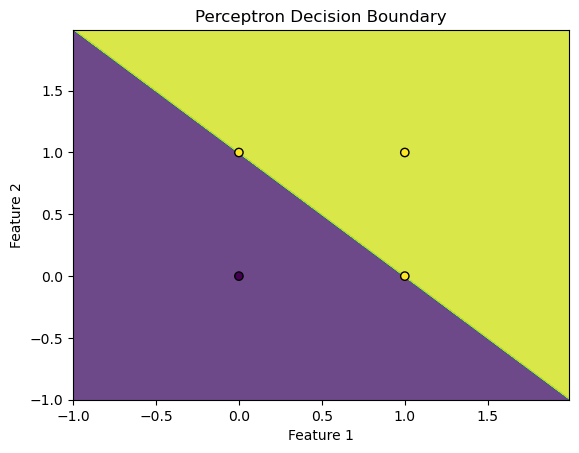

In [12]:
# 퍼셉트론 학습
model = Perceptron(learning_rate=0.1, n_iter=10)
model.fit(X, y)

# 예측
predictions = model.predict(X)
print("예측 결과:", predictions)

# 결정 경계 시각화
plot_decision_boundary(X, y, model)

### NAND 게이트
- NAND (Not AND) 게이트는 AND 게이트의 출력을 반전시킨 것으로, 두 개 이상의 입력을 받아들이고, 모든 입력이 1일 때만 출력이 0이 되는 논리 연산을 수행합니다.

In [13]:
# NAND 게이트
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = np.array([1, 1, 1, 0])

예측 결과: [1 1 1 0]


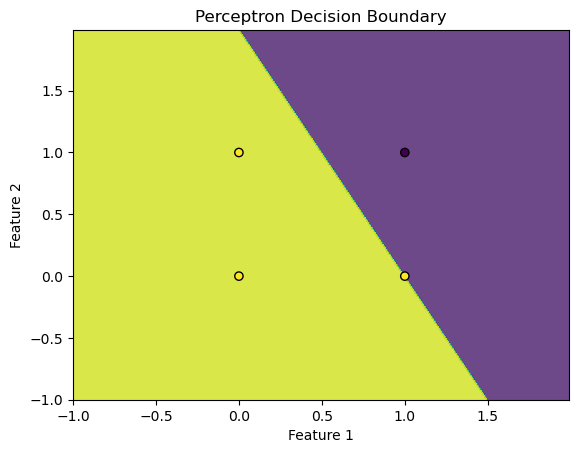

In [14]:
# 퍼셉트론 학습
model = Perceptron(learning_rate=0.1, n_iter=10)
model.fit(X, y)

# 예측
predictions = model.predict(X)
print("예측 결과:", predictions)

# 결정 경계 시각화
plot_decision_boundary(X, y, model)